## Name- Kirtan Rajesh
#### Reg No- 21BRS1148
#### Email Id- kirtnarajesh@gmail.com
#### College- VIT Chennai
#### Bird Classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#How to add the file to gdrive

1. Open the drive link shared
2. Click the three dots next to ***HV-AI-2024*** and select 'Make a copy'

In [2]:
# Correcting the file path syntax and copying the file
!cp "/content/drive/My Drive/HV-AI-2024.zip" /content/

# Unzipping the file in the Colab working directory
!unzip /content/HV-AI-2024.zip

# Removing unnecessary files and folders
!rm -rf /content/__MACOSX
!mv /content/HV-AI-2024/* /content/
!rm -rf /content/HV-AI-2024
!rm /content/HV-AI-2024.zip
!rm -rf /content/sample_data

# Clearing output to keep the notebook tidy
from google.colab import output
output.clear()


# **Plot Sample Images**

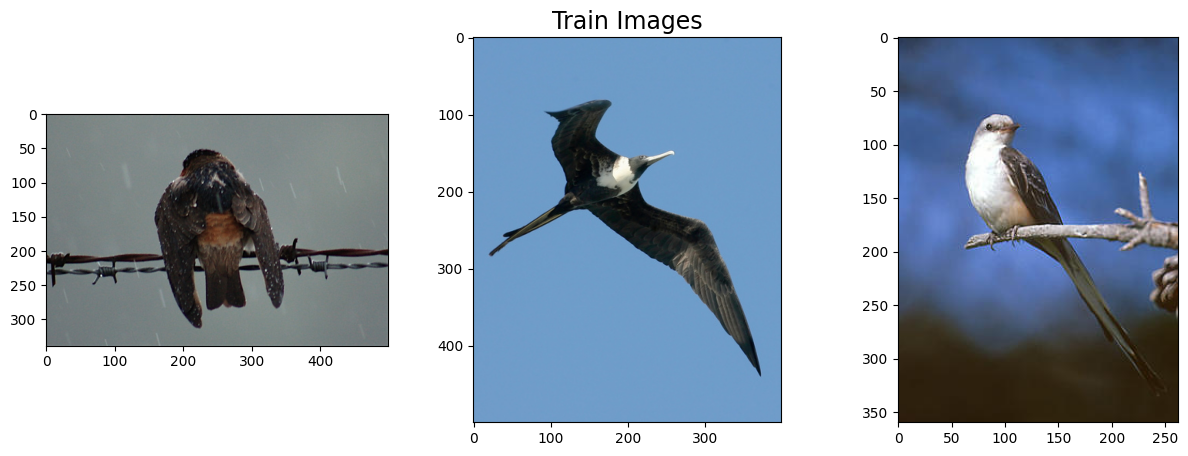

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob


train_images = glob('images/train/*.jpg')[0:3]
test_images = glob('images/test/*.jpg')[0:3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(train_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Train Images',fontsize=17)
plt.show()

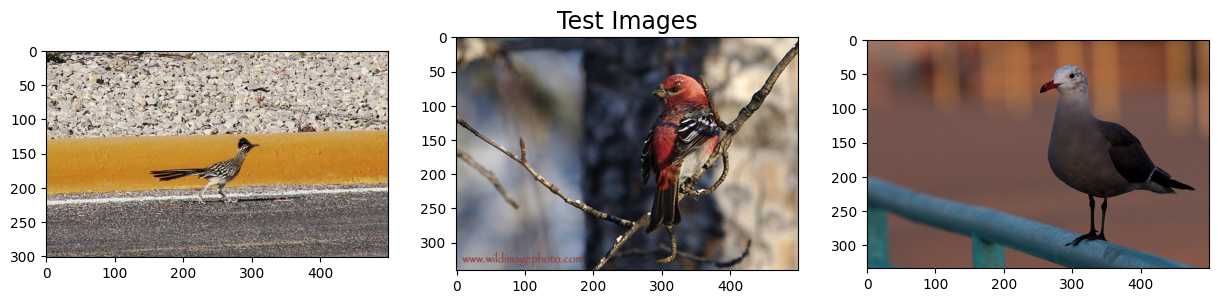

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, image in enumerate(test_images):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)

axes[1].set_title('Test Images',fontsize=17)
plt.show()

# **Load/Preprocess **data****

In [2]:
!pip install -q tf_keras

In [3]:
import pandas as pd
from glob import glob

# Load the train and test labels
train_labels = pd.read_csv('train.csv')
test_labels = pd.read_csv('test.csv')

# Get the paths for train and test images
train_images = glob('/content/images/train/*.jpg')
test_images = glob('/content/images/test/*.jpg')

print(f"Number of training images: {len(train_images)}")
print(f"Number of test images: {len(test_images)}")


Number of training images: 5994
Number of test images: 5794


In [4]:
# Check the structure of the directory
import os
data_dir="/content/images"
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '/content/images'
There are 0 directories and 5794 images in '/content/images/test'
There are 0 directories and 5994 images in '/content/images/train'


In [8]:
os.makedirs(f"/content/image_folds")

In [7]:
# Load the CSV file
train_csv = '/content/train.csv'

train_df = pd.read_csv(train_csv)

# Create directories based on classes
classes = train_df['class'].unique()
for cls in classes:
    os.makedirs(f'/content/image_folds/train/{cls}', exist_ok=True)

In [10]:
from PIL import Image
import os
import pandas as pd

# Load CSV data
train_df = pd.read_csv('/content/train.csv')  # Update the path to your CSV file

# Process each image
for index, row in train_df.iterrows():
    img_path = row['path']
    cls = row['class']
    save_dir = f'/content/image_folds/train/{cls}/'
    file_name = os.path.basename(img_path)
    save_path = os.path.join(save_dir, file_name)
    img = Image.open(img_path)
    img.save(save_path)


In [5]:
# Check the structure of the directory
import os
data_dir="/content/image_folds"
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 1 directories and 0 images in '/content/image_folds'
There are 200 directories and 0 images in '/content/image_folds/train'
There are 0 directories and 30 images in '/content/image_folds/train/56'
There are 0 directories and 30 images in '/content/image_folds/train/151'
There are 0 directories and 30 images in '/content/image_folds/train/17'
There are 0 directories and 30 images in '/content/image_folds/train/82'
There are 0 directories and 30 images in '/content/image_folds/train/103'
There are 0 directories and 30 images in '/content/image_folds/train/42'
There are 0 directories and 30 images in '/content/image_folds/train/141'
There are 0 directories and 30 images in '/content/image_folds/train/9'
There are 0 directories and 30 images in '/content/image_folds/train/52'
There are 0 directories and 30 images in '/content/image_folds/train/34'
There are 0 directories and 30 images in '/content/image_folds/train/47'
There are 0 directories and 30 images in '/content/image_fold

In [6]:
## Creating train and validation sets
from tf_keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
    directory = os.path.join(data_dir,"train"),
    label_mode = 'categorical',
    validation_split = 0.2,
    subset = 'training',
    batch_size = 16,
    image_size = (224, 224),
    shuffle = True,
    seed = 42,
)

val_data = image_dataset_from_directory(
    directory = os.path.join(data_dir,"train"),
    label_mode = 'categorical',
    validation_split = 0.2,
    subset = 'validation',
    batch_size = 16,
    image_size = (224, 224),
    shuffle = False,
    seed = 42,
)

Found 5994 files belonging to 200 classes.
Using 4796 files for training.
Found 5994 files belonging to 200 classes.
Using 1198 files for validation.


In [7]:
class_names = train_data.class_names
class_names

['0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 

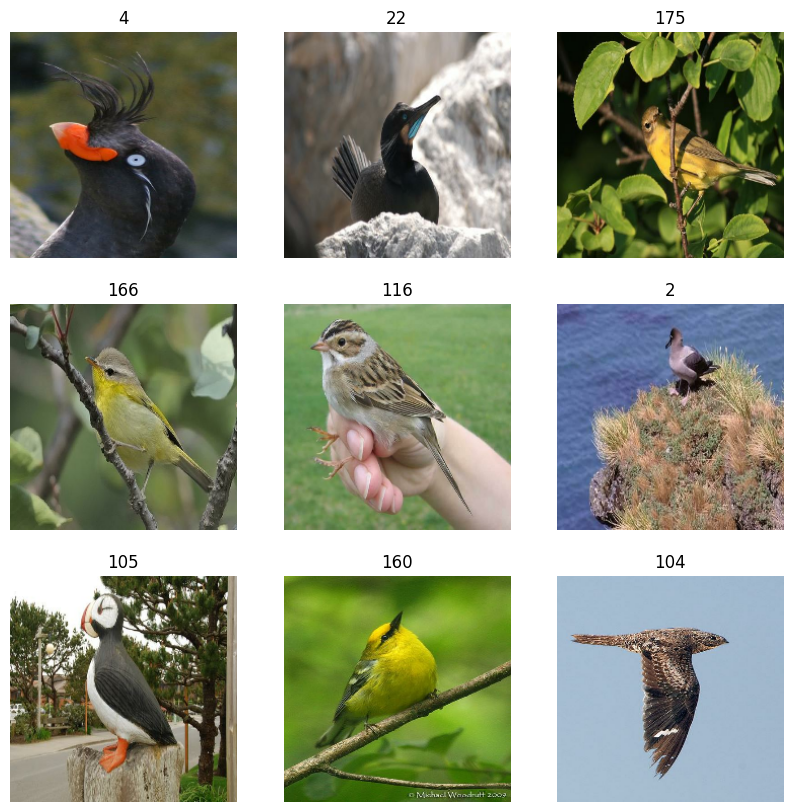

In [11]:
# Fetch a batch of images and labels
for images, labels in train_data.take(1):  # Assumes train_data is a tf.data.Dataset
    break

# Plot the images with their corresponding labels
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))  # Convert image tensor to numpy array
    label = np.argmax(labels[i].numpy())  # Convert label tensor to numpy array and get the index
    plt.title(class_names[label])
    plt.axis('off')
plt.show()

In [8]:
# Define data augmentation and rescaling layers

import tf_keras
from tf_keras import Sequential, layers

rescaling_layer = Sequential([
    layers.Rescaling(1/255.)
], name = 'rescaling_layer')

data_augmentation = Sequential([
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.3),
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
], name = 'augmentation_layer')

In [9]:
import tensorflow as tf

# Mapping these layers to the data
train_df = train_data.map(
    lambda x, y: (rescaling_layer(x), y),
    num_parallel_calls = tf.data.AUTOTUNE
).shuffle(buffer_size=3000).prefetch(tf.data.AUTOTUNE)

train_aug_df = train_data.map(
    lambda x,y: (data_augmentation(x), y),
    num_parallel_calls = tf.data.AUTOTUNE
).shuffle(buffer_size=3000).prefetch(tf.data.AUTOTUNE)

val_df = val_data.map(
    lambda x, y: (rescaling_layer(x), y),
    num_parallel_calls = tf.data.AUTOTUNE
).prefetch(tf.data.AUTOTUNE)

In [9]:
train_df

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 200), dtype=tf.float32, name=None))>

In [15]:
# Checking out an sample of the data
train_sample = train_df.take(1)
train_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 200), dtype=tf.float32, name=None))>

# **Model initialization/Training**

#### Using 3 pretrained models - Resnet50, Efficientnet and Xception model

In [25]:
# Resnet 50 V2 feature vector
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-classification/2"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1"


In [10]:
import tensorflow_hub as hub
from tf_keras import layers, Model, Sequential

# Making a function to create model
def create_model(model_url, num_classes=5, input_shape = (224, 224, 3)):
  # Download the pretrained model
  feature_extractor_layer = hub.KerasLayer(
      model_url,
      trainable = False,
      name = 'feature_extractor_layer',
      input_shape = input_shape)

  # Create the model
  model = Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])

  return model

In [11]:
# Create a model-checkpoint callback
def create_model_checkpoint(save_dir):
  return tf_keras.callbacks.ModelCheckpoint(filepath=save_dir,
                                            monitor = 'val_loss',
                                            save_best_only = True,
                                            save_weights_only = True,
                                            verbose = 0,
                                            mode = 'min')

In [12]:
# Plot loss curves of the model
import matplotlib.pyplot as plt

def plot_loss_curves(history, metrics_to_plot=["loss", "accuracy"]):
    plt.figure(figsize=(10, 10))
    for index, metric in enumerate(metrics_to_plot):
        ax = plt.subplot(2, 1, index + 1)
        plt.plot(history.history[metric], label=f"training {metric}")
        plt.plot(history.history[f"val_{metric}"], label=f"val {metric}")
        plt.title(f"{metric} vs Epochs curve")
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend()

In [13]:
# Making a function to compare histories at any time
def compare_history_overall(
    history_lst=[], initial_epoch_lst=[5], metrics_to_plot=["loss", "accuracy"]
):
    plt.figure(figsize=(12, 12))
    for index, metric in enumerate(metrics_to_plot):
        total_mtr = history_lst[0].history[metric]
        total_val_mtr = history_lst[0].history[f"val_{metric}"]

        for history in history_lst[1:]:
            total_mtr = total_mtr + history.history[metric]
            total_val_mtr = total_val_mtr + history.history[f"val_{metric}"]

        plt.subplot(2, 1, index + 1)
        plt.plot(total_mtr, label=f"Training {metric}")
        plt.plot(total_val_mtr, label=f"Validation {metric}")

        for epoch in initial_epoch_lst:
            plt.plot([epoch - 1, epoch - 1], plt.ylim())

        plt.title(f"Training and validation {metric}")
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.tight_layout()
        plt.legend()

In [14]:
from tf_keras.optimizers import Adam
import tensorflow as tf

def get_range_epoch_results(
    model,
    epoch_lst=[5, 20],
    callbacks=None,
    loss_fn="binary_crossentropy",
    train_data=train_df,
    test_data=val_df,
    use_best_only = True,
    learning_rate = 0.001
):
    history_lst = []
    eval_res = []

    epoch_lst = [0] + epoch_lst
    for index, epoch in enumerate(epoch_lst[1:]):
        checkpoint_path = f"model_exp/{model.name}_{index}.ckpt"

        if index == 0:
            model.compile(loss=loss_fn, optimizer=Adam(learning_rate = learning_rate), metrics=["accuracy"])

        # Make the callback list
        if callbacks:
            callbacks += [
                create_model_checkpoint(save_dir=checkpoint_path)
            ]
        else:
            callbacks = [
                create_model_checkpoint(save_dir=checkpoint_path)
            ]

        # Set the initial_epoch and train the data from it
        initial_epoch = epoch_lst[index]
        print(
            f"Fitting and training the model: \n  Initial epochs: {initial_epoch}\n  Total epochs: {epoch}\n"
        )
        model_history = model.fit(
            train_df,
            steps_per_epoch=len(train_df),
            epochs=epoch,
            initial_epoch=initial_epoch,
            validation_data=val_df,
            validation_steps=len(val_df),
            verbose=0,
            callbacks=callbacks,
        )

        print(f"Trained the model till {epoch} epochs!!!\n")

        # Load in the best model
        if use_best_only:
          print(f'Model saved at checkpoint path: `{checkpoint_path}`')
          print(f"Loading the best weights model {index + 1}")
          model.load_weights(checkpoint_path)

        # Evaluating the model
        print("Getting the evaluation results")
        eval_res.append(model.evaluate(test_data))

        history_lst.append(model_history)

        print()
        print("-" * 50)
        print()

    return history_lst, eval_res

In [22]:
len(class_names)

200

#### Resnet50 Model Training

In [23]:
# Create the model
resnet_model = create_model(resnet_url,
                            num_classes = len(class_names))

# Compile the model
resnet_model.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                     optimizer = Adam(),
                     metrics = ['accuracy'])

# Fit the model
resnet_history = resnet_model.fit(train_df,
                                  epochs = 5,
                                  steps_per_epoch = len(train_df),
                                  validation_data = val_df,
                                  validation_steps = len(val_df),
                                  callbacks = [create_model_checkpoint(
                                      save_dir = 'model_exp/resnet_model.weights.h5'
                                  )])

Epoch 1/5
300/300 [==============================] - 38s 72ms/step - loss: 3.5994 - accuracy: 0.2615 - val_loss: 1.3692 - val_accuracy: 0.6644
Epoch 2/5
300/300 [==============================] - 26s 66ms/step - loss: 1.4457 - accuracy: 0.6051 - val_loss: 0.9020 - val_accuracy: 0.7705
Epoch 3/5
300/300 [==============================] - 26s 61ms/step - loss: 0.8745 - accuracy: 0.7598 - val_loss: 0.7718 - val_accuracy: 0.8264
Epoch 4/5
300/300 [==============================] - 26s 61ms/step - loss: 0.5783 - accuracy: 0.8411 - val_loss: 0.6440 - val_accuracy: 0.8623
Epoch 5/5
300/300 [==============================] - 26s 61ms/step - loss: 0.3975 - accuracy: 0.9005 - val_loss: 0.6337 - val_accuracy: 0.8614


In [24]:
# Get the summary of the model
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (K  (None, 1001)              25615849  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 200)               200400    
                                                                 
Total params: 25816249 (98.48 MB)
Trainable params: 200400 (782.81 KB)
Non-trainable params: 25615849 (97.72 MB)
_________________________________________________________________


In [25]:
# Evaluate on the test data
resnet_model.evaluate(val_df)

75/75 [==============================] - 4s 48ms/step - loss: 0.6337 - accuracy: 0.8614


[0.633705735206604, 0.8614357113838196]

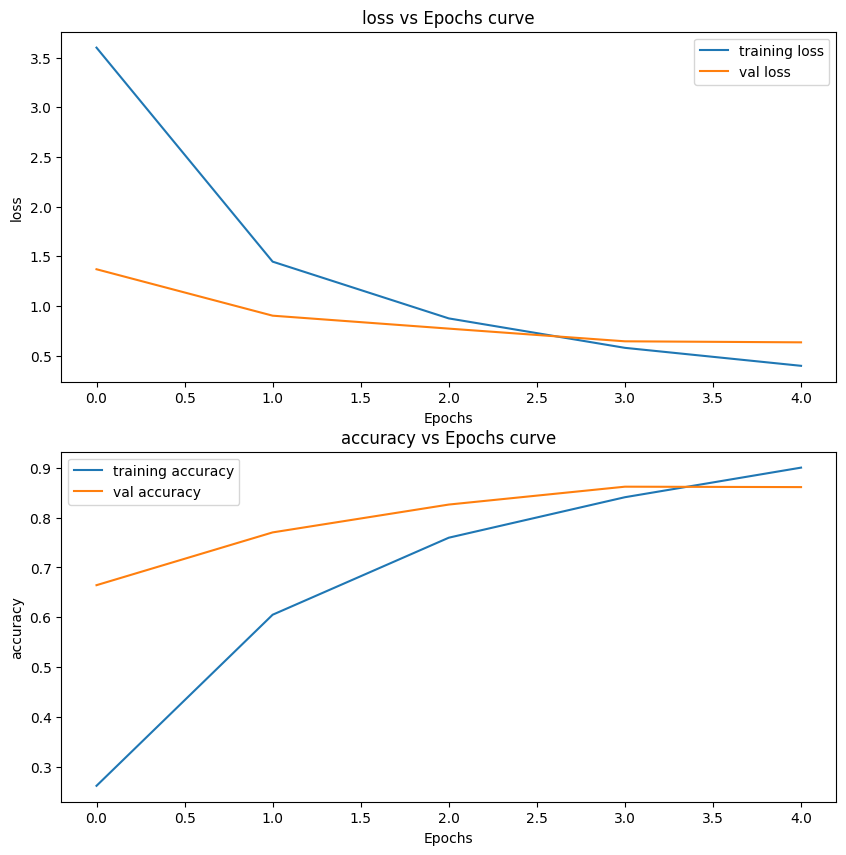

In [26]:
# Plot loss curves
plot_loss_curves(resnet_history)

In [28]:
# Getting predictions using the model
resnet_pred_probs = resnet_model.predict(val_df)
resnet_pred_probs

75/75 [==============================] - 6s 55ms/step


array([[7.21440229e-05, 1.18934599e-06, 3.81531936e-06, ...,
        2.32623534e-12, 6.14134432e-09, 1.82094936e-05],
       [4.89011290e-05, 9.68374843e-06, 7.33259913e-06, ...,
        1.81537899e-07, 2.73676687e-06, 2.09240184e-07],
       [1.82608746e-05, 6.83390070e-04, 4.00779163e-06, ...,
        5.74944869e-10, 2.05686068e-09, 5.74931178e-08],
       ...,
       [2.14814492e-07, 6.92663016e-05, 7.22417965e-08, ...,
        9.11119713e-09, 1.29108824e-11, 9.99707997e-01],
       [1.34791405e-08, 1.39005954e-06, 4.90751306e-09, ...,
        1.97438160e-11, 1.77748746e-14, 9.98836458e-01],
       [1.56786322e-04, 2.08962403e-04, 6.12171448e-07, ...,
        1.06254028e-07, 2.77720989e-12, 9.96134639e-01]], dtype=float32)

In [29]:
len(resnet_pred_probs)

1198

In [30]:
del resnet_pred_probs

In [16]:
# performing checkpoint evaluation
epoch_list = [3,6,9,12]

# resnet_model = tf_keras.models.clone_model(resnet_model)

resnet_model = create_model(resnet_url,
                            num_classes = len(class_names))

history_lst, eval_lst = get_range_epoch_results(
    resnet_model,
    epoch_lst=epoch_list,
    loss_fn=tf_keras.losses.CategoricalCrossentropy()
)


Fitting and training the model: 
  Initial epochs: 0
  Total epochs: 3

Trained the model till 3 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_0.ckpt`
Loading the best weights model 1
Getting the evaluation results
75/75 [==============================] - 4s 46ms/step - loss: 0.7650 - accuracy: 0.8180

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 3
  Total epochs: 6

Trained the model till 6 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_1.ckpt`
Loading the best weights model 2
Getting the evaluation results
75/75 [==============================] - 5s 59ms/step - loss: 0.5842 - accuracy: 0.8831

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 6
  Total epochs: 9

Trained the model till 9 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_2.ckpt`
Loading the best weights model 3
Getting the evaluation results
75/75 [=========

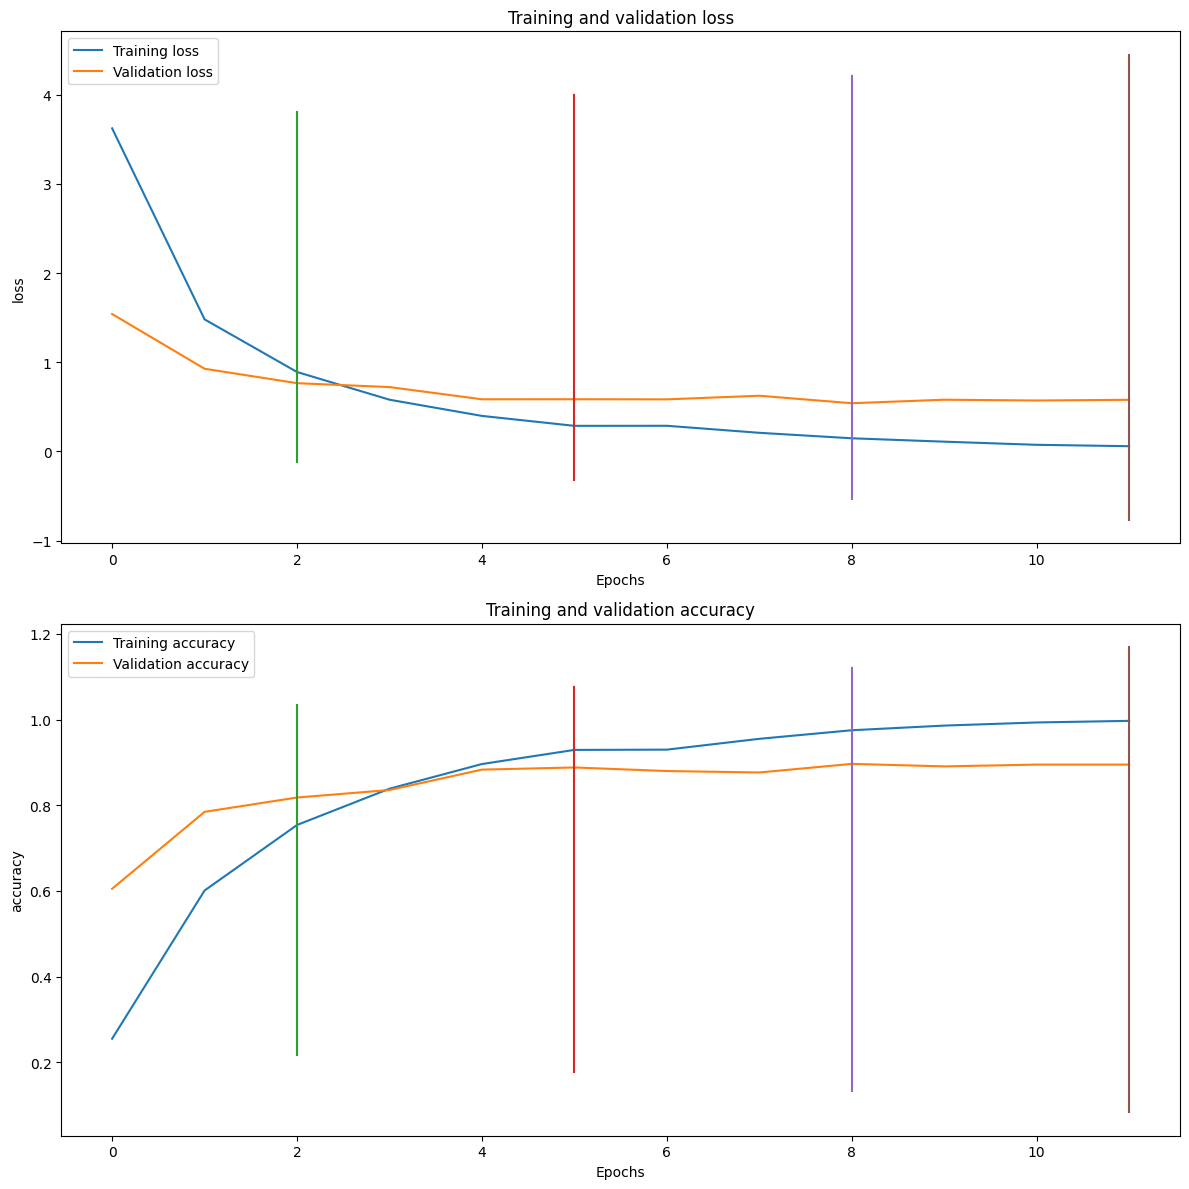

In [17]:
compare_history_overall(history_lst,
                        initial_epoch_lst = epoch_list)

In [18]:
resnet_model.load_weights("model_exp/sequential_2.ckpt")

In [19]:
# Evaluate on the test data
resnet_model.evaluate(val_df)

75/75 [==============================] - 4s 49ms/step - loss: 0.5401 - accuracy: 0.8965


[0.5401306748390198, 0.8964941501617432]

#### Fine-tune the Resnet model, make last 7 layers of each trainable, then fit the normal data

In [20]:
# Making function to make model with n_layers trainable
def make_model_trainable(model, n_train_layers = 7):
  # Unfreeze all of the layers in the model
  model.trainable = True

  # Refreeze every layer except for the last n layers
  for layer in model.layers[:-n_train_layers]:
    layer.trainable = False

In [21]:
# Get the resnet model
resnet_model = tf_keras.applications.resnet50.ResNet50(include_top=False)
resnet_model._name = 'resnet_model_finetune'

# Checkout the layers of the model
for layer_number, layer in enumerate(resnet_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 True
1 conv1_pad True
2 conv1_conv True
3 conv1_bn True
4 conv1_relu True
5 pool1_pad True
6 pool1_pool True
7 conv2_block1_1_conv True
8 conv2_block1_1_bn True
9 conv2_block1_1_relu True
10 conv2_block1_2_conv True
11 conv2_block1_2_bn True
12 conv2_block1_2_relu True
13 conv2_block1_0_conv True
14 conv2_block1_3_conv True
15 conv2_block1_0_bn True
16 conv2_block1_3_bn True
17 conv2_block1_add True
18 conv2_block1_out True
19 conv2_block2_1_conv True
20 conv2_block2_1_bn True
21 conv2_block2_1_relu True
22 conv2_block2_2_conv True
23 conv2_block2_2_bn True
24 conv2_block2_2_relu True
25 conv2_block2_3_conv True
26 conv2_block2_3_bn True
27 conv2_block2_add True
28 conv2_block2_out True
29 conv2_block3_1_conv True
30 conv2_block3_1_bn True
31 conv2_block3_1_relu True
32 conv2_block3_2_conv True
33 conv2_block3_2_bn True
34 conv2_block3_2_relu True
35 conv2_block3_3_conv True
36 conv2_block3_3_bn True
37 conv2_block3_add True
38 conv2_block3_out True
39 conv3_block1_1_conv Tru

In [22]:
# Make n-layers trainable
make_model_trainable(resnet_model,n_train_layers =5)

In [23]:
# Check which layers are trainable
for layer_number, layer in enumerate(resnet_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [24]:
# Create model for the resnet
inputs = layers.Input(shape = (224, 224 ,3), name = 'input_layer')
x = resnet_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(200, activation='softmax', name='output_layer')(x)
model = tf_keras.Model(inputs, outputs)
model._name = resnet_model._name

# Compile and fit the model for different epochs
EPOCH_LST = [3,6,9,12]

history_lst_res_fine, eval_lst_res_fine = get_range_epoch_results(
    model,
    epoch_lst=EPOCH_LST,
    loss_fn=tf_keras.losses.CategoricalCrossentropy(),
    train_data = train_df,
    learning_rate = 1e-4
)

Fitting and training the model: 
  Initial epochs: 0
  Total epochs: 3

Trained the model till 3 epochs!!!

Model saved at checkpoint path: `model_exp/resnet_model_finetune_0.ckpt`
Loading the best weights model 1
Getting the evaluation results
75/75 [==============================] - 4s 55ms/step - loss: 5.3012 - accuracy: 0.0025

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 3
  Total epochs: 6

Trained the model till 6 epochs!!!

Model saved at checkpoint path: `model_exp/resnet_model_finetune_1.ckpt`
Loading the best weights model 2
Getting the evaluation results
75/75 [==============================] - 4s 54ms/step - loss: 5.2695 - accuracy: 0.0109

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 6
  Total epochs: 9

Trained the model till 9 epochs!!!

Model saved at checkpoint path: `model_exp/resnet_model_finetune_2.ckpt`
Loading the best weights model 3
Getting the ev

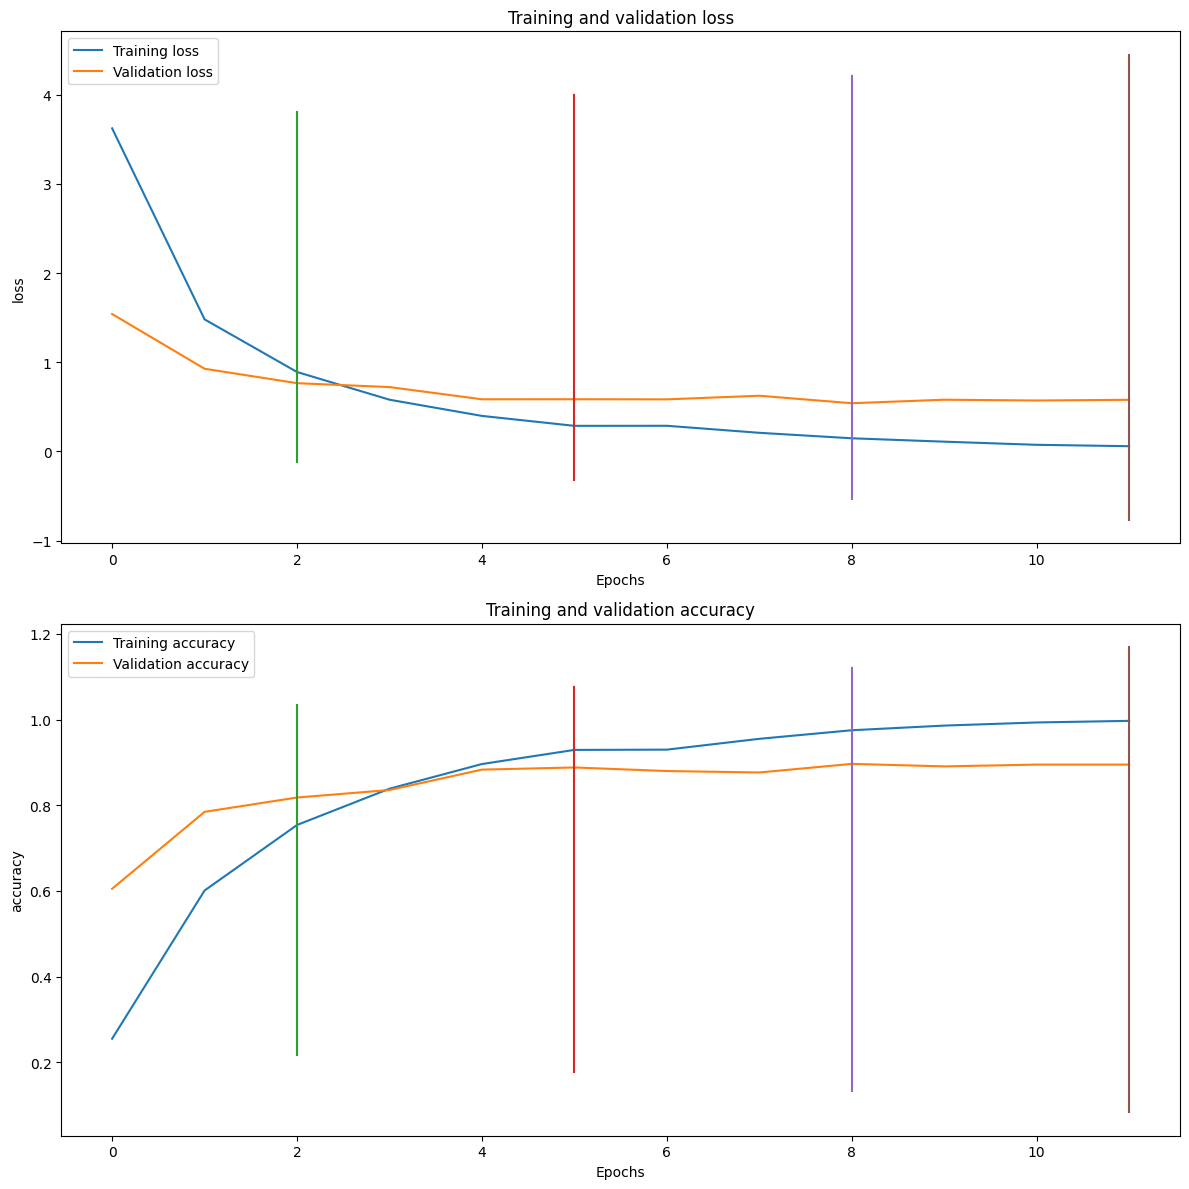

In [25]:
compare_history_overall(history_lst,
                        initial_epoch_lst = epoch_list)

In [26]:
model.load_weights("model_exp/resnet_model_finetune_3.ckpt")

In [27]:
# Evaluate on the test data
model.evaluate(val_df)

75/75 [==============================] - 5s 60ms/step - loss: 5.0851 - accuracy: 0.0159


[5.085131645202637, 0.01585976593196392]

In [28]:
import keras
keras.backend.clear_session()

## EfficientNetB1 Model training

In [29]:
# Create the model
efficient_model = create_model(efficientnet_url,
                               num_classes = len(class_names))

# Compile the model
efficient_model.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                     optimizer = Adam(),
                     metrics = ['accuracy'])

# Fit the model
efficient_history = efficient_model.fit(train_df,
                                  epochs = 5,
                                  steps_per_epoch = len(train_df),
                                  validation_data = val_df,
                                  validation_steps = len(val_df),
                                  callbacks = [create_model_checkpoint(
                                      save_dir = 'model_exp/efficientnet_model.ckpt'
                                  )])

Epoch 1/5
300/300 [==============================] - 51s 79ms/step - loss: 3.2778 - accuracy: 0.3488 - val_loss: 1.4611 - val_accuracy: 0.7120
Epoch 2/5
300/300 [==============================] - 34s 72ms/step - loss: 1.3313 - accuracy: 0.7465 - val_loss: 0.7750 - val_accuracy: 0.8706
Epoch 3/5
300/300 [==============================] - 24s 60ms/step - loss: 0.8203 - accuracy: 0.8605 - val_loss: 0.5398 - val_accuracy: 0.8990
Epoch 4/5
300/300 [==============================] - 24s 59ms/step - loss: 0.5675 - accuracy: 0.9151 - val_loss: 0.4488 - val_accuracy: 0.9190
Epoch 5/5
300/300 [==============================] - 28s 67ms/step - loss: 0.4161 - accuracy: 0.9502 - val_loss: 0.3580 - val_accuracy: 0.9441


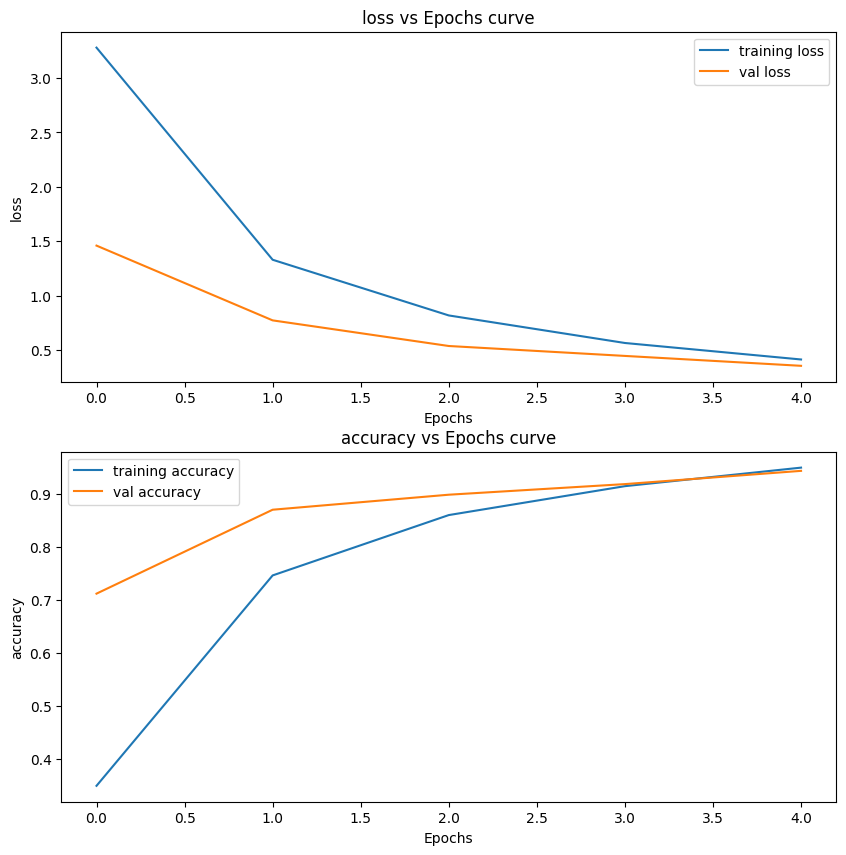

In [30]:
# Plot loss curves
plot_loss_curves(efficient_history)

In [31]:
# Evaluate on the test data
efficient_model.evaluate(val_df)

75/75 [==============================] - 3s 44ms/step - loss: 0.3580 - accuracy: 0.9441


[0.3580285310745239, 0.9440734386444092]

In [17]:
# performing  checkpoint evaluation
epoch_list = [3,6,9,12]

efficient_model2  = create_model(efficientnet_url,
                               num_classes = len(class_names))

history_lst, eval_lst = get_range_epoch_results(
    efficient_model2,
    epoch_lst=epoch_list,
    loss_fn=tf_keras.losses.CategoricalCrossentropy()
)


Fitting and training the model: 
  Initial epochs: 0
  Total epochs: 3

Trained the model till 3 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_0.ckpt`
Loading the best weights model 1
Getting the evaluation results
75/75 [==============================] - 3s 44ms/step - loss: 0.5496 - accuracy: 0.9107

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 3
  Total epochs: 6

Trained the model till 6 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_1.ckpt`
Loading the best weights model 2
Getting the evaluation results
75/75 [==============================] - 4s 53ms/step - loss: 0.3140 - accuracy: 0.9516

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 6
  Total epochs: 9

Trained the model till 9 epochs!!!

Model saved at checkpoint path: `model_exp/sequential_2.ckpt`
Loading the best weights model 3
Getting the evaluation results
75/75 [=========

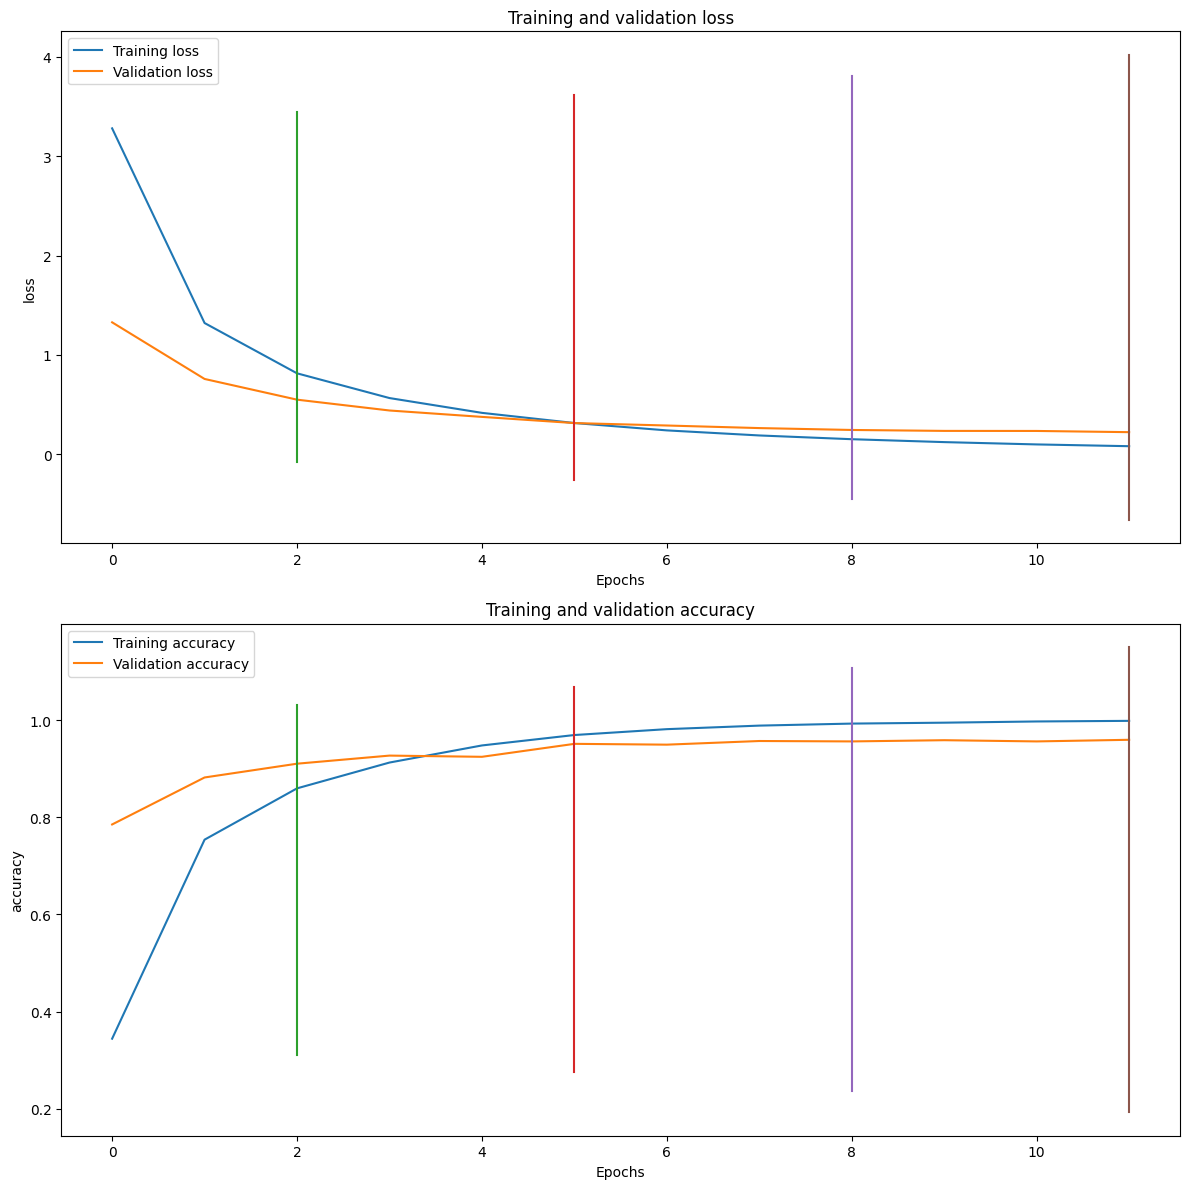

In [18]:
compare_history_overall(history_lst,
                        initial_epoch_lst = epoch_list)

In [21]:
efficient_model2.load_weights("model_exp/sequential_3.ckpt")

In [22]:
# Evaluate on the test data
efficient_model2.evaluate(val_df)

75/75 [==============================] - 4s 52ms/step - loss: 0.2225 - accuracy: 0.9599


[0.22246570885181427, 0.9599332213401794]

In [23]:
import keras
keras.backend.clear_session()

## XceptionNet model training

In [15]:
xcep_model = tf_keras.applications.Xception(
    include_top=False,
    classes=len(class_names),
)

In [16]:
# Create model for the XceptionNet
inputs = layers.Input(shape = (224, 224 ,3), name = 'input_layer')
x = xcep_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(200, activation='softmax', name='output_layer')(x)
model = tf_keras.Model(inputs, outputs)
model._name = xcep_model._name

In [17]:
# Compile and fit the model for different epochs
EPOCH_LST = [3,6,9,12]

history_lst_exp, eval_lst_exp = get_range_epoch_results(
    model,
    epoch_lst=EPOCH_LST,
    loss_fn=tf_keras.losses.CategoricalCrossentropy(),
    train_data = train_df,
    learning_rate = 1e-4
)

Fitting and training the model: 
  Initial epochs: 0
  Total epochs: 3

Trained the model till 3 epochs!!!

Model saved at checkpoint path: `model_exp/xception_0.ckpt`
Loading the best weights model 1
Getting the evaluation results
75/75 [==============================] - 5s 67ms/step - loss: 2.0129 - accuracy: 0.5860

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 3
  Total epochs: 6

Trained the model till 6 epochs!!!

Model saved at checkpoint path: `model_exp/xception_1.ckpt`
Loading the best weights model 2
Getting the evaluation results
75/75 [==============================] - 5s 69ms/step - loss: 0.6212 - accuracy: 0.8823

--------------------------------------------------

Fitting and training the model: 
  Initial epochs: 6
  Total epochs: 9

Trained the model till 9 epochs!!!

Model saved at checkpoint path: `model_exp/xception_2.ckpt`
Loading the best weights model 3
Getting the evaluation results
75/75 [===============

In [21]:
model.load_weights("model_exp/xception_3.ckpt")

In [22]:
# Evaluate on the test data
model.evaluate(val_df)

75/75 [==============================] - 5s 67ms/step - loss: 0.5341 - accuracy: 0.8965


[0.5340660214424133, 0.8964941501617432]

 **We can see that the EfficientnetB1 model performs the best with an accuracy of 95.99 .
Hence we use the EfficientnetB1 model for our use case.**

# **Model Inference**

In [26]:
# Getting the best efficientNet model for inferencing
efficient_model2 = create_model(efficientnet_url,
                               num_classes = len(class_names))

# Load the weights of the best performing model
efficient_model2.load_weights("model_exp/sequential_3.ckpt")

In [47]:
from tf_keras.preprocessing import image
from tf_keras.applications.efficientnet import preprocess_input

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def predict_and_save_results(model, img_dir, output_csv):
    results = []
    for img_file in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_file)
        img_array = load_and_preprocess_image(img_path)

        # Predict the class probabilities
        predictions = model.predict(img_array)
        class_idx = np.argmax(predictions[0])
        confidence = float(predictions[0][class_idx])

        # Append the result
        results.append({
            'path (str)': f"images/test/{img_file.split('_')[1]}",
            'predicted_label(int)': class_idx,
            'confidence_score(float)': confidence
        })

    # Convert results to DataFrame and save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=True)

    return results_df

In [48]:
# Set the directory test images and the output CSV file
img_dir = '/content/images/test'
output_csv = '/content/predictions.csv'

# Perform inference and save results to CSV
results_df = predict_and_save_results(efficient_model2, img_dir, output_csv)

# Optionally, display the results DataFrame
print(results_df)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
                path (str)  predicted_label(int)  confidence_score(float)
0      images/test/996.jpg                    78                      1.0
1     images/test/2215.jpg                    20                      1.0
2     images/test/2929.jpg                   138                      1.0
3     images/test/3805.jpg                   190                      1.0
4     images/test/5156.jpg                   157                      1.0
...                    ...                   ...                      ...
5789  images/test/4252.jpg                    40                      1.0
5790  images/test/4801.jpg                    41                      1.0
5791  images/test/4137.jpg                   143                      1.0
5792  images/test/4192.jpg                   194                      1.0
5793  images/test/5420.jpg                    34                      1.0

[5794 ro

In [49]:
# Remove parentheses and the words inside them from column names
results_df.columns = results_df.columns.str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Display the updated DataFrame
print(results_df.head())


                   path  predicted_label  confidence_score
0   images/test/996.jpg               78               1.0
1  images/test/2215.jpg               20               1.0
2  images/test/2929.jpg              138               1.0
3  images/test/3805.jpg              190               1.0
4  images/test/5156.jpg              157               1.0


In [52]:
results_df.to_csv("/content/predictions.csv", index=False)

# **Helper Functions**

In [50]:
import requests

def send_results_for_evaluation(name, csv_file, email):
    url = "http://43.205.49.236:5050/inference"
    files = {'file': open(csv_file, 'rb')}
    data = {'email': email, 'name':name}
    response = requests.post(url, files=files, data=data)
    return response.json()



# ***Test Inference***


This function is used to save the csv file and send it to the evaluation server.

Format of CSV file (Follow the header names strictly):

        path (str)              predicted_label(int)   confidence_score(float)
    images/test/xx.jpg                  1                         0.6
    images/test/yy.jpg                  2                         0.9
            :                           :                          :
            :                           :                          :

Once the prediction file is saved as shown in the above format, you can send it to the evaluation server along with your email.

Caution: check your **email** before executing the cell.


In [54]:
import pandas as pd

# Load the CSV file to check its content
predictions_df = pd.read_csv('/content/predictions.csv')
print(predictions_df.head())
print(f"Total rows: {len(predictions_df)}")


                   path  predicted_label  confidence_score
0   images/test/996.jpg               78               1.0
1  images/test/2215.jpg               20               1.0
2  images/test/2929.jpg              138               1.0
3  images/test/3805.jpg              190               1.0
4  images/test/5156.jpg              157               1.0
Total rows: 5794


In [56]:
print('Accuracy: ')
print(send_results_for_evaluation('Kirtan Rajesh', 'predictions.csv', 'kirtanrajesh@gmail.com'))

Accuracy: 
{'error': 'max() arg is an empty sequence'}
